In [24]:
%load_ext autoreload
%autoreload 2
from yahpo_train.cont_normalization import ContNormalization
from yahpo_train.model  import *
from yahpo_gym import cfg
from yahpo_train.metrics import *
from yahpo_gym.benchmarks import lcbench

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
cfg = cfg("lcbench")
dls = dl_from_config(cfg, bs=2048)

In [26]:
f = FFSurrogateModel(dls, layers=[512,512], deeper = [], ps = [0., 0.])

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
l = SurrogateTabularLearner(dls, f, loss_func=nn.MSELoss(reduction='mean'), metrics=nn.MSELoss)
l.metrics = [AvgTfedMetric(mae),  AvgTfedMetric(r2), AvgTfedMetric(spearman)]
l.add_cb(MixHandler)

SuggestedLRs(valley=0.00017060824029613286)

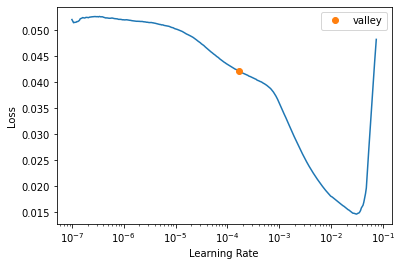

In [50]:
l.lr_find()

In [21]:
l.fit_flat_cos(20, 1e-3)

epoch,train_loss,valid_loss,mae,r2,spearman,time
0,0.002359,0.002411,[4.10923454e+01 4.75675384e+00 1.55142921e-01 3.82996094e-02 5.52784524e-02 3.79877077e-02],[0.88964503 0.88741112 0.72891861 0.93069187 0.98913348 0.93134616],[0.99397201 0.93390141 0.95749634 0.95302066 0.98038927 0.95374826],01:51
1,0.002108,0.002186,[3.84656410e+01 4.79695049e+00 1.42559294e-01 3.60486039e-02 4.51671702e-02 3.55261481e-02],[0.90489751 0.89028779 0.75839579 0.93967748 0.99272003 0.93993686],[0.99477198 0.9375756 0.96277825 0.96108044 0.98011048 0.96165172],01:53


> c:\users\flo\documents\yahpo_gym\yahpo_train\yahpo_train\metrics.py(16)accumulate()
     14         if torch.any(torch.isnan(learn.tfpred)):
     15             import pdb; pdb.set_trace()
---> 16         self.total += learn.to_detach(self.func(*learn.tfyb, learn.tfpred))*bs
     17         self.count += bs
     18     @property

*** AttributeError: 'FFSurrogateModel' object has no attribute 'ypred'
tensor([[0.4516, 0.5483, 0.7005, 0.5024, 0.8356, 0.5134],
        [0.4589, 0.5566, 0.6954, 0.5109, 0.8340, 0.5229],
        [0.4655, 0.5649, 0.6901, 0.5192, 0.8324, 0.5319],
        ...,
        [0.3691, 0.6462, 0.5166, 0.5496, 0.3402, 0.5725],
        [0.3720, 0.6466, 0.5166, 0.5500, 0.3407, 0.5731],
        [0.3750, 0.6466, 0.5168, 0.5500, 0.3412, 0.5732]])
(tensor([716]), tensor([2]))
2
*** SyntaxError: invalid syntax
*** AttributeError: module 'torch' has no attribute 'pred'
tensor([0.7005, 0.6954, 0.6901,  ..., 0.5166, 0.5166, 0.5168])
*** SyntaxError: invalid syntax
tensor([0.7005, 

BdbQuit: 

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.002770,0.002792,[5.94913669e+01 5.05835613e+00 2.06943109e-01 4.02316429e-02 1.49938111e-01 3.99589922e-02],02:22


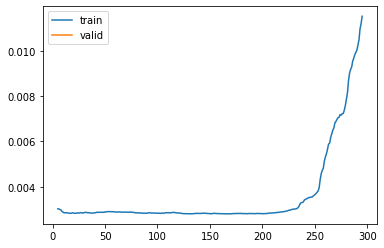

In [9]:
l.recorder.plot_loss()

In [43]:
for p in l.model.deep.parameters():
    p.requires_grad = False

In [70]:
l.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,mean_absolute_error,time


In [45]:
for p in l.model.deep.parameters():
    p.requires_grad = True
for p in l.model.wide.parameters():
    p.requires_grad = False
l.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.002423,0.002393,[4.98986526e+01 4.77996190e+00 1.55345619e-01 3.71719113e-02 7.76551635e-02 3.68900378e-02],01:41


In [19]:
lmbda = torch.Tensor([-1.5758])


from sklearn.preprocessing import PowerTransformer
PowerTr

In [58]:
l.fit_one_cycle(1,1e-5)

AttributeError: 'list' object has no attribute 'sorted'

In [28]:
from scipy.stats import spearmanr
x=np.random.rand(100,5)
y=np.random.rand(100,5)
rho = [spearmanr(xs, ys)[0]  for xs,ys in zip(np.rollaxis(x, 1), np.rollaxis(y, 1))]
rho

[-0.055001500150014995,
 -0.012373237323732371,
 0.0356075607560756,
 0.07332733273327331,
 -0.09797779777977797]